# Customer Segmentation
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

# Advantages of Customer Segmentation:
1.Determine appropriate product pricing.
2.Develop customized marketing campaigns.
3.Design an optimal distribution strategy.
4.Prioritize new product development efforts.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import chart_studio.tools as tls
import chart_studio
import chart_studio.plotly as py

In [ ]:
pip install chart_studio

In [ ]:
sc=StandardScaler()
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

<Axes: xlabel='count', ylabel='Gender'>

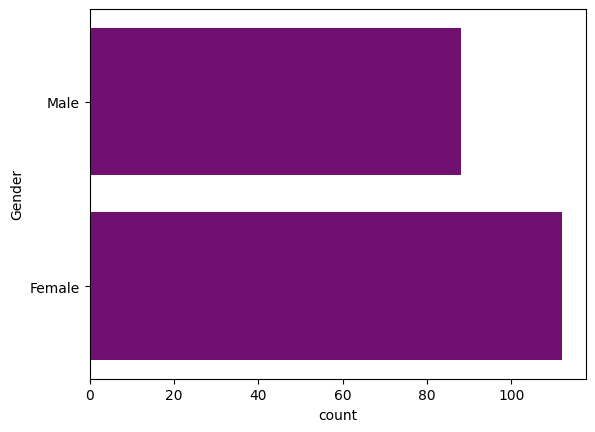

In [ ]:
x=df['Gender'].value_counts()
sns.countplot(df['Gender'],color='purple')

# EDA And Customer Segementaion According to Age and Spending Score

In [ ]:
print(df['Age'].describe())

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [32]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Creating the initial histogram
fig = px.histogram(df, x='Age')

# Filter data for specific customers
df5 = df[df['CustomerID'] == 5]
df6 = df[df['CustomerID'] == 6]

# Add scatter traces for specific customers
fig.add_trace(
    go.Scatter(
        x=df5['Age'],
        y=df5['Spending Score (1-100)'],
        mode="markers",
        name="customer5"
    )
)
fig.add_trace(
    go.Scatter(
        x=df6['Age'],
        y=df6['Spending Score (1-100)'],
        mode="markers",
        name="customer6"
    )
)

# Show the figure at the end
fig.show()

In [ ]:
px.scatter(df,x='Age',y='Spending Score (1-100)',color='Age')

In [26]:
x=df[['Age','Spending Score (1-100)']]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


# Scaling all the values

In [27]:
X=sc.fit_transform(x)

# Finding Number of clusters

In [28]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    a=km.inertia_
    sse.append(a)
a=range(1,10)
px.line(x=a,y=sse)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

From graph it can be seen that min number of clusters should be 4.


# Building the Model

In [33]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(X)
prediction


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [34]:
df['age_cluster']=prediction
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [35]:
df1=df[df['age_cluster']==0]
df2=df[df['age_cluster']==1]
df3=df[df['age_cluster']==2]
df4=df[df['age_cluster']==3]

# Ploting the segmented graph

In [36]:
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=df1['Age'],
        y=df1['Spending Score (1-100)'],
        mode="markers",
        name="customer1"
    ))
fig.add_trace(
    go.Scatter(
        x=df2['Age'],
        y=df2['Spending Score (1-100)'],
        mode="markers",
        name="customer2"
    ))
fig.add_trace(
    go.Scatter(
        x=df3['Age'],
        y=df3['Spending Score (1-100)'],
        mode="markers",
        name="customer3"
    ))
fig.add_trace(
    go.Scatter(
        x=df4['Age'],
        y=df4['Spending Score (1-100)'],
        mode="markers",
        name="customer4"
    ))


fig.show()

# EDA And Customer Segementaion According to Annual Income and Spending Score

In [37]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [38]:
px.histogram(df,x='Annual Income (k$)')

Most people have annual income about 70-79 k dollars

In [39]:
px.scatter(df,x='Annual Income (k$)', y='Spending Score (1-100)',color='Annual Income (k$)')

In [40]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [41]:
X=sc.fit_transform(x)

In [42]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    p=km.inertia_
    sse.append(p)
sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 46.85522014153861,
 37.21509197608592,
 32.52761568981719]

In [43]:
a=range(1,10)
px.line(x=a,y=sse)

It can be seen from the plot that there will be 5 clusters

# Building the model

In [44]:
km=KMeans(n_clusters=5)
prediction=km.fit_predict(X)
df['salary_cluster']=prediction
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_cluster,salary_cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,0,4


In [45]:
df1=df[df['salary_cluster']==0]
df2=df[df['salary_cluster']==1]
df3=df[df['salary_cluster']==2]
df4=df[df['salary_cluster']==3]
df5=df[df['salary_cluster']==4]

# Ploting The segmeted graph

In [46]:
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=df1['Annual Income (k$)'],
        y=df1['Spending Score (1-100)'],
        mode="markers",
        name="customer1"
    ))
fig.add_trace(
    go.Scatter(
        x=df2['Annual Income (k$)'],
        y=df2['Spending Score (1-100)'],
        mode="markers",
        name="customer2"
    ))
fig.add_trace(
    go.Scatter(
        x=df3['Annual Income (k$)'],
        y=df3['Spending Score (1-100)'],
        mode="markers",
        name="customer3"
    ))
fig.add_trace(
    go.Scatter(
        x=df4['Annual Income (k$)'],
        y=df4['Spending Score (1-100)'],
        mode="markers",
        name="customer4"
    ))
fig.add_trace(
    go.Scatter(
        x=df5['Annual Income (k$)'],
        y=df5['Spending Score (1-100)'],
        mode="markers",
        name="customer5"
    ))

fig.show()


In [47]:
x=df[['Annual Income (k$)','Age','Spending Score (1-100)']]
x

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40
...,...,...,...
195,120,35,79
196,126,45,28
197,126,32,74
198,137,32,18


# Scaling the values

In [48]:
X=sc.fit_transform(x)

# Finding Numeber of clusters

In [49]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    p=km.inertia_
    sse.append(p)
a=range(1,10)
px.line(x=a,y=sse)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

It can be seen the number of clusters are 6

# Building the model

In [50]:
km=KMeans(n_clusters=6)
prediction=km.fit_predict(X)
df['all_cluster']=prediction
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_cluster,salary_cluster,all_cluster
0,1,Male,19,15,39,0,4,5
1,2,Male,21,15,81,2,3,5
2,3,Female,20,16,6,0,4,4
3,4,Female,23,16,77,2,3,5
4,5,Female,31,17,40,0,4,4


In [51]:
df1=df[df['all_cluster']==0]
df2=df[df['all_cluster']==1]
df3=df[df['all_cluster']==2]
df4=df[df['all_cluster']==3]
df5=df[df['all_cluster']==4]
df6=df[df['all_cluster']==5]

In [52]:
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=df1['Annual Income (k$)'],y=df1['Age'],z=df1['Spending Score (1-100)'],mode="markers",
        name="customer1"))
fig.add_trace(go.Scatter3d(x=df2['Annual Income (k$)'],y=df2['Age'],z=df2['Spending Score (1-100)'],mode="markers",
        name="customer2"))
fig.add_trace(go.Scatter3d(x=df3['Annual Income (k$)'],y=df3['Age'],z=df3['Spending Score (1-100)'],mode="markers",
        name="customer3"))
fig.add_trace(go.Scatter3d(x=df4['Annual Income (k$)'],y=df4['Age'],z=df4['Spending Score (1-100)'],mode="markers",
        name="customer4"))
fig.add_trace(go.Scatter3d(x=df5['Annual Income (k$)'],y=df5['Age'],z=df5['Spending Score (1-100)'],mode="markers",
        name="customer5"))
fig.add_trace(go.Scatter3d(x=df6['Annual Income (k$)'],y=df6['Age'],z=df6['Spending Score (1-100)'],mode="markers",
        name="customer6"))
fig.show()